### mm. yea. explore that data.

In [180]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [181]:
#steam data set
data = pd.read_csv("Data\games-features.csv")

In [182]:
#exclude dupicate games
data = data.drop_duplicates() 
#keep games only
data = data[data.GenreIsNonGame == False]

In [183]:
import re
from collections import OrderedDict
#pattern used for detecting year
pattern = re.compile("\d{4}$")

def year_distrib( gamelist):
    year_distrib = {}
    for index, row in gamelist.iterrows():
        match = pattern.search(row['ReleaseDate'])
        if match:
            year = int(match.group(0))
            if year not in year_distrib:
                year_distrib[year]=0
            year_distrib[year] = year_distrib[year]+1    
    return year_distrib

#divide game by payment type
free_games = data[data.IsFree == True]
paid_games = data[data.PurchaseAvail == True]
sub_games = data[data.SubscriptionAvail == True]

free = year_distrib(free_games)
paid = year_distrib(paid_games)
sub = year_distrib(sub_games)

print("free Games by year:  " + str(sorted(free.items())))
print("total number of free games: "+ str( sum(free.values())))
print()
print("Paid Games:  " + str(sorted(paid.items())))
print("total number of paid games: "+ str( sum(paid.values())))
print()
print("Subscription Games:  " + str(sorted(sub.items())))

free Games by year:  [(2001, 2), (2003, 1), (2004, 1), (2005, 2), (2006, 5), (2007, 5), (2008, 7), (2009, 9), (2010, 5), (2011, 17), (2012, 34), (2013, 39), (2014, 97), (2015, 215), (2016, 510), (2017, 9)]
total number of free games: 958

Paid Games:  [(1997, 1), (1998, 1), (1999, 2), (2000, 2), (2001, 4), (2003, 3), (2004, 7), (2005, 5), (2006, 71), (2007, 111), (2008, 176), (2009, 350), (2010, 309), (2011, 287), (2012, 357), (2013, 491), (2014, 1593), (2015, 2700), (2016, 4014), (2017, 5)]
total number of paid games: 10489

Subscription Games:  [(2010, 1), (2015, 3), (2016, 7)]


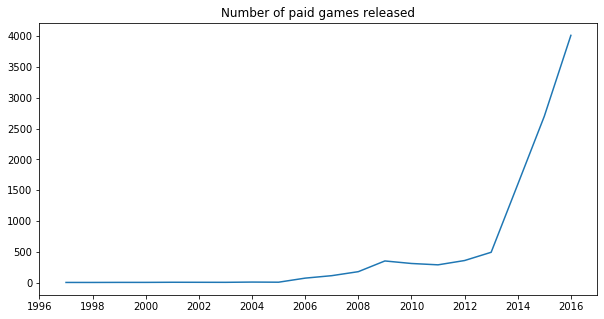

In [184]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import seaborn as sns

paid_dist = sorted(paid.items())
plt.figure(figsize=(10,5))
plt.xlim(1996,2017)
plt.xticks(np.arange(1996, 2017, step=2))
plt.plot([i[0]for i in paid_dist][:-1], [i[1]for i in paid_dist][:-1])
plt.title("Number of paid games released")
plt.show()

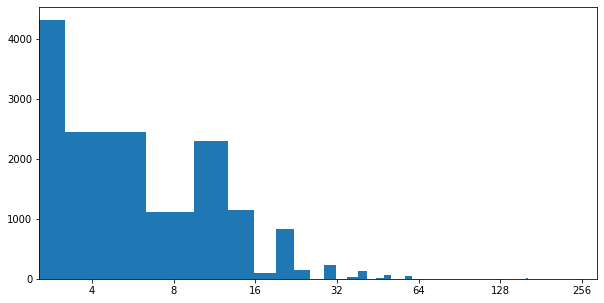

In [185]:
#price distrib

def price_distrib( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price not in price_distrib:
            price_distrib[price]=0
        price_distrib[price] = price_distrib[price]+1    
    return price_distrib


prices = price_distrib(data)
prices = sorted(prices.items())
price = [i[0]for i in prices]
count = [i[1] for i in prices]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#plt.plot(price, count)
plt.hist(price,weights=count, bins = len(price))
plt.xscale("log")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

In [186]:
# avegrage game price
avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)
print("total price: "+ str(avg_price))
print("total games: "+ str(total))
print("average price per game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median game price: "+ str(np.median(list_prices))+" $")

total price: 109725.79000000004
total games: 12985
average price per game: 8.450195610319602 $
median game price: 5.99 $


In [187]:

# avegrage game price\
def price_distrib_paid( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price != 0.0:
            if price not in price_distrib:
                price_distrib[price]=0
            price_distrib[price] = price_distrib[price]+1    
    return price_distrib

prices_paid_games = sorted(price_distrib_paid(paid_games).items())
price_paid = [i[0]for i in prices_paid_games]
count_paid = [i[1] for i in prices_paid_games]

avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price_paid):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)

print("total price: "+ str(avg_price))
print("total paid games: "+ str(total))
print("average price per paid game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median paid game price: "+ str(np.median(list_prices))+" $")

total price: 115219.08000000003
total paid games: 12984
average price per paid game: 8.873927911275418 $
median paid game price: 6.49 $


In [ ]:
# how price and player base covary? --- PCA? variance covariance and scipy.stats.pearsonr to calculate correlation coefficient

In [ ]:
#find lsit of franchises by finding common naming list of games that have a word in commin in the name

In [ ]:
#make matrix of game name and franchise it belongs to ----> build network of games linked by franchise---> maybe include other stuf

In [ ]:
# make a prediciton model here?

In [ ]:
#word cloud for genres, names, descriptions?

In [ ]:
# sentiment analysis on name or ddescription ----> metascore? how it effects it

In [ ]:
# distribution of games by genre (for every genre, find the variation of number of games  and number of releases)

In [ ]:
#price vs sales (SteamSpyOwners & SteamSpyPlayersEstimate)
#free vs subscription vs purchase -----> player count recommendation and popularity?

In [ ]:
#find games that have multiple releases (sequals) how does the previous successs influence the new one?

In [ ]:
# meta critic vs name & description (we can also use player base)

In [ ]:
#CategorySinglePlayer	CategoryMultiplayer	CategoryCoop	CategoryMMO	CategoryVRSupport
